# Transforming csv to json / action grids

In [19]:
import pandas as pd 
import numpy as np 
import json

df = pd.read_csv('../checkpoints/PPO_Card Count_v1.csv')
df

,dealer show card,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
0,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,7,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,8,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,9,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
8,10,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0
9,11,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0


Brewing the Action Grid

In [ ]:
basic_strategy_grid = np.array([
    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0],  # Dealer shows Ace
    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0],  # Dealer shows 2
    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0],  # Dealer shows 3
    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0],  # Dealer shows 4
    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0],  # Dealer shows 5
    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0],  # Dealer shows 6
    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0],  # Dealer shows 7
    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0],  # Dealer shows 8
    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0],  # Dealer shows 9
    [1, 1, 1, 1, 1, 1, 0, 0, 0, 0],  # Dealer shows 10
])


In [45]:
policy_grid = df.to_numpy()[:,11:21]
policy_grid

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 0.],
       [1., 1., 1., 1., 1., 1., 0., 0., 0., 0.]])

In [ ]:
np.save('../checkpoints/PPO_Counting_Cards.npy', policy_grid)

Brewing the action dictionary

In [ ]:
df = df.copy()

action_dict = {}

for row in df.itertuples(index=False):
    print(row)
    dealer_card = int(row[0])  
    for col_idx, user_sum in enumerate(df.columns[1:]):
        user_sum = int(user_sum)
        action = int(row[col_idx + 1]) 
        key = (user_sum, dealer_card, True)

        if user_sum == 11:
            usable_ace = True
        else:
            usable_ace = False
            
        key = str((user_sum, dealer_card, usable_ace))
        action_dict[key] = action

with open('../policies/PPO_Counting_Cards.json', "w") as f:
    json.dump(action_dict, f, indent=2)


Pandas(_0=2, _1=1.0, _2=1.0, _3=1.0, _4=1.0, _5=1.0, _6=1.0, _7=1.0, _8=1.0, _9=1.0, _10=1.0, _11=0.0, _12=0.0, _13=0.0, _14=0.0, _15=0.0, _16=0.0, _17=0.0, _18=0.0, _19=0.0, _20=0.0)
Pandas(_0=3, _1=1.0, _2=1.0, _3=1.0, _4=1.0, _5=1.0, _6=1.0, _7=1.0, _8=1.0, _9=1.0, _10=1.0, _11=0.0, _12=0.0, _13=0.0, _14=0.0, _15=0.0, _16=0.0, _17=0.0, _18=0.0, _19=0.0, _20=0.0)
Pandas(_0=4, _1=1.0, _2=1.0, _3=1.0, _4=1.0, _5=1.0, _6=1.0, _7=1.0, _8=1.0, _9=1.0, _10=1.0, _11=0.0, _12=0.0, _13=0.0, _14=0.0, _15=0.0, _16=0.0, _17=0.0, _18=0.0, _19=0.0, _20=0.0)
Pandas(_0=5, _1=1.0, _2=1.0, _3=1.0, _4=1.0, _5=1.0, _6=1.0, _7=1.0, _8=1.0, _9=1.0, _10=1.0, _11=0.0, _12=0.0, _13=0.0, _14=0.0, _15=0.0, _16=0.0, _17=0.0, _18=0.0, _19=0.0, _20=0.0)
Pandas(_0=6, _1=1.0, _2=1.0, _3=1.0, _4=1.0, _5=1.0, _6=1.0, _7=1.0, _8=1.0, _9=1.0, _10=1.0, _11=0.0, _12=0.0, _13=0.0, _14=0.0, _15=0.0, _16=0.0, _17=0.0, _18=0.0, _19=0.0, _20=0.0)
Pandas(_0=7, _1=1.0, _2=1.0, _3=1.0, _4=1.0, _5=1.0, _6=1.0, _7=1.0, _8=1.0, _9=

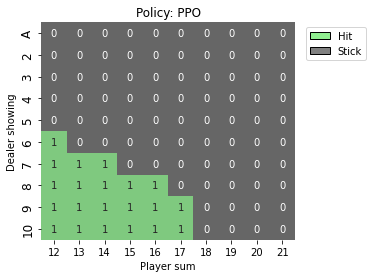

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
import seaborn as sns

fig = plt.figure(figsize=plt.figaspect(0.4))

# plot the policy
fig.add_subplot(1, 2, 2)
ax2 = sns.heatmap(policy_grid, linewidth=0, annot=True, cmap="Accent_r", cbar=False)
ax2.set_title(f"Policy: PPO")
ax2.set_xlabel("Player sum")
ax2.set_ylabel("Dealer showing")
ax2.set_xticklabels(range(12, 22))
ax2.set_yticklabels(["A"] + list(range(2, 11)), fontsize=12)

# add a legend
legend_elements = [
    Patch(facecolor="lightgreen", edgecolor="black", label="Hit"),
    Patch(facecolor="grey", edgecolor="black", label="Stick"),
]
ax2.legend(handles=legend_elements, bbox_to_anchor=(1.3, 1))

In [47]:
# Visualization (optional, requires matplotlib)
import matplotlib.pyplot as plt


basic_strategy_grid = np.array([
    [1, 1, 1, 1, 1, 1, 1, 0, 0, 0],  # Dealer shows Ace
    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0],  # Dealer shows 2
    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0],  # Dealer shows 3
    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0],  # Dealer shows 4
    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0],  # Dealer shows 5
    [1, 1, 1, 1, 0, 0, 0, 0, 0, 0],  # Dealer shows 6
    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0],  # Dealer shows 7
    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0],  # Dealer shows 8
    [1, 1, 1, 1, 1, 0, 0, 0, 0, 0],  # Dealer shows 9
    [1, 1, 1, 1, 1, 1, 0, 0, 0, 0],  # Dealer shows 10
])

coverage = policy_grid == basic_strategy_grid
coverage_pcnt = np.sum(coverage) / coverage.size * 100
print(f"Policy matches basic strategy on {np.sum(coverage)}/{coverage.size} cells")
print(f"Coverage: {coverage_pcnt:.2f}%")

Policy matches basic strategy on 68/100 cells
Coverage: 68.00%
